In [39]:
# %run coalition-calculations-exclude-2021.py # GL/PvdA is already combined, so input them as a single party

# %run coalition-calculations-exclude-2023.py

%run coalition-calculations.py



In [40]:
if __name__ == "__main__":
    # kabinetten, zetels = load_data()
    kabinetten, zetels, ek_zetels = load_data()
    coalition_counter = build_coalition_frequency(kabinetten)

    # User Input  # <<—— Add the (alleged) seat distribution for the election you want to predict
    seat_distribution = {
        'VVD': 30,
        'GL/PvdA': 28,
        'D66': 10,
        'CDA': 18,
        'CU': 3,
        'PVV': 28,
        'BBB': 2,
        'SP': 8,
        'PvdD': 5,
        'NSC': 2,
        'DENK': 4,
        'FvD': 3,
        'SGP': 3,
        'Volt': 3,
        'JA21': 3
}

    Jaar = 2025  # <<—— Add the election year for Eerste Kamer seat distribution

    predictions = predict_coalitions(
        seat_distribution, 
        coalition_counter, 
        ek_zetels=ek_zetels, 
        Jaar=Jaar, 
        threshold=76, 
        top_k=7
    )


    for p in predictions:
        print(f"Coalition: {p['coalition']}")
        print(f"  Seats: {p['seats']}")
        print(f"  History Score: {p['historical_score']}")
        # print(f"  Topic Score: {p['topic_score']}")
        print(f"  Ideology Score: {p['ideology_score']}")
        print(f"  EK Score: {p['ek_score']}")  # Optional: show EK alignment
        print(f"  EK Seats: {p['ek_total_seats']}")
        print(f"  Party Penalty: {p['party_penalty']}")
        print(f"  Surplus Penalty: {p['surplus_penalty']}")
        print(f"  Final Score: {p['final_score']}%")
        print("")


Coalition: ('VVD', 'GL/PvdA', 'CDA', 'SGP')
  Seats: 79
  History Score: 1.05
  Ideology Score: 2.04
  EK Score: 0.43
  EK Seats: 32
  Party Penalty: 0
  Surplus Penalty: 0.0
  Final Score: 3.3%

Coalition: ('VVD', 'GL/PvdA', 'CDA', 'NSC')
  Seats: 78
  History Score: 1.05
  Ideology Score: 2.06
  EK Score: 0.4
  EK Seats: 30
  Party Penalty: 0
  Surplus Penalty: 0.0
  Final Score: 2.0%

Coalition: ('VVD', 'GL/PvdA', 'CDA')
  Seats: 76
  History Score: 1.05
  Ideology Score: 2.48
  EK Score: 0.4
  EK Seats: 30
  Party Penalty: 0
  Surplus Penalty: 0.0
  Final Score: 0%

Coalition: ('VVD', 'GL/PvdA', 'D66', 'SP')
  Seats: 76
  History Score: 1.1
  Ideology Score: 2.41
  EK Score: 0.43
  EK Seats: 32
  Party Penalty: 0
  Surplus Penalty: 0.0
  Final Score: 0%

Coalition: ('VVD', 'GL/PvdA', 'D66', 'CU', 'PvdD')
  Seats: 76
  History Score: 1.1
  Ideology Score: 2.39
  EK Score: 0.47
  EK Seats: 35
  Party Penalty: 2
  Surplus Penalty: 0.0
  Final Score: 0%

Coalition: ('VVD', 'GL/PvdA', '

In [41]:
# parties_2023 = {
#         'VVD': 24,
#         'GL/PvdA': 25,
#         'D66': 9,
#         'CDA': 5,
#         'CU': 3,
#         'PVV': 37,
#         'BBB': 7,
#         'SP': 5,
#         'PvdD': 3,
#         'NSC': 20,
#         'DENK': 3,
#         'FvD': 3,
#         'SGP': 3,
#         'Volt': 2,
#         'JA21': 1
# }

# parties_2021 = {
        # 'PVV':17,
        # 'VVD':34,
        # 'D66':24,
        # 'BBB':1,
        # 'CDA':15,
        # 'SP':9,
        # 'FvD':8,
        # 'PvdD':6,
        # 'SGP':3,
        # 'ChristenUnie':5,
        # 'DENK':3,
        # 'Volt':3,
        # 'JA21':3,
        # 'PvdA':9,
        # 'GroenLinks':8,
        # '50Plus':1,
        # 'BIJ1':1,
# }

# peiling_27052025 = {
#         'VVD': 30,
#         'GL/PvdA': 28,
#         'D66': 10,
#         'CDA': 18,
#         'CU': 3,
#         'PVV': 28,
#         'BBB': 2,
#         'SP': 8,
#         'PvdD': 5,
#         'NSC': 2,
#         'DENK': 4,
#         'FvD': 3,
#         'SGP': 3,
#         'Volt': 3,
#         'JA21': 3
# }

/tmp/ipykernel_76338/3936670675.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=final_scores, y=coalitions, palette='viridis')


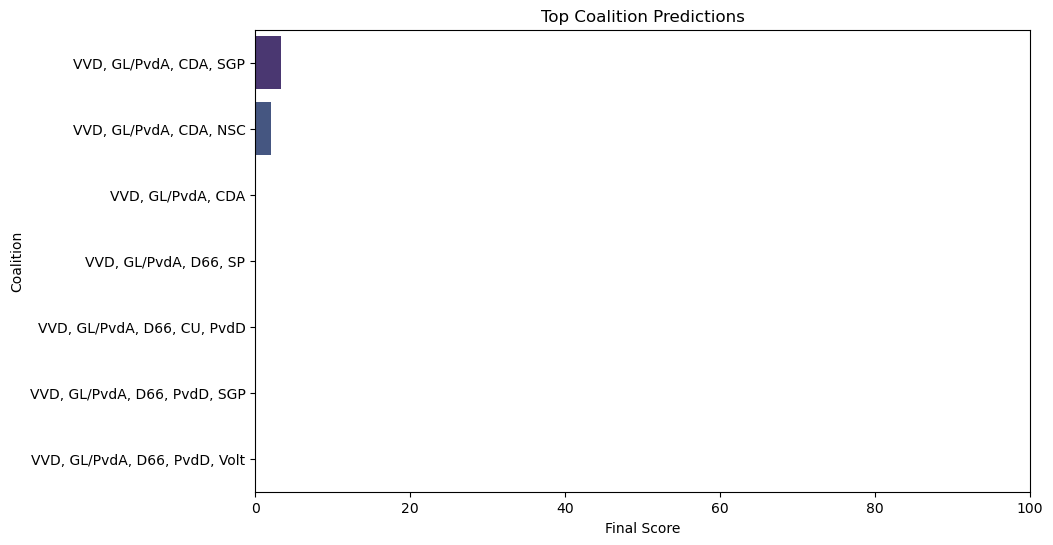

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_coalition_scores(predictions):
    coalitions = [', '.join(p['coalition']) for p in predictions]
    final_scores = [p['final_score'] for p in predictions]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=final_scores, y=coalitions, palette='viridis')
    plt.xlabel('Final Score')
    plt.ylabel('Coalition')
    plt.title('Top Coalition Predictions')
    plt.xlim(0, 100)
    plt.show()

plot_coalition_scores(predictions)